In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from API

In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv('./../controller/.env')


True

In [9]:
print(os.getenv("API_URL"))

https://zerofourtwo.new/api


In [67]:
# load dataset from api
headers = {"Authorization": f"Bearer {os.getenv('API_SECRET_KEY')}"}
df = pd.read_json(r'https://zerofourtwo.net/api/dataset', storage_options=headers)

In [68]:

df = df.query("_user == 'rodrigo'")
df.shape

(46, 14)

In [69]:
#df['vx_shot_accuracy'].describe()

In [70]:
hMzx = df.iloc[:, [2, 9]]

df.groupby('_user')['bm_HR_max'].max()
df.loc[df['bm_HR_max'] == 0, 'bm_HR_max'] = df['bm_HR_max'].mean()

In [71]:
dfK = df.query("bm_HR_max > 0")
dfK

,_id,_date,_user,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_max,bm_HR_avg,bm_HR_var,bm_act_steps,bm_sleep
317,318,2024-03-12T11:03:00.000Z,rodrigo,2.58687,80.0000,2.06647,52.9412,81.8182,2192.95,220.0,NaN,NaN,NaN,NaN
318,319,2024-03-12T23:03:34.000Z,rodrigo,2.28430,92.3077,1.89252,59.3750,80.8511,1861.10,220.0,NaN,NaN,NaN,NaN
346,347,2024-04-13T20:00:53.000Z,rodrigo,1.87252,100.0000,1.90880,46.6667,96.5517,1672.09,183.0,75.0,37.0,NaN,3.0


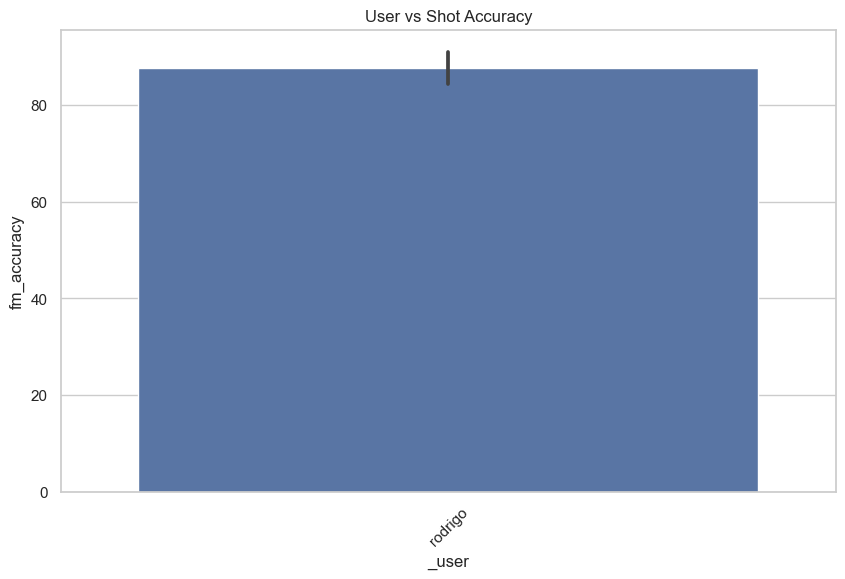

In [72]:
# plot _user vs vx_shot_accuracy
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="_user", y="fm_accuracy", data=df)
plt.title("User vs Shot Accuracy")
plt.xticks(rotation=45)
plt.show()


# Clean Dataset

In [73]:
# delete unwanted columns
unwanted_columns = ['_id', '_date', '_user', 'bm_HR_max', 'bm_act_steps']
df_wanted = df.drop(unwanted_columns, axis=1)

In [74]:
# drop rows with missing values
df_wanted = df_wanted.dropna()
df_wanted.isna().sum()

fm_avg_trk_time     0
fm_accuracy         0
vx_avg_res_time     0
vx_shot_accuracy    0
vx_trg_accuracy     0
au_avg_res_time     0
bm_HR_avg           0
bm_HR_var           0
bm_sleep            0
dtype: int64

In [75]:
df_wanted.shape

(21, 9)

# Inspect data

In [76]:
df_wanted.head()

,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_avg,bm_HR_var,bm_sleep
321,1.97617,75.0000,1.43688,59.7015,86.9565,1121.92,65.0,36.0,4.0
322,1.64999,85.7143,1.54022,60.9375,78.0000,1972.44,77.0,41.0,2.0
323,1.97476,85.7143,1.77898,52.5424,86.1111,1993.22,69.0,37.0,3.0
324,2.06714,85.7143,1.41964,57.1429,87.8049,1627.98,70.0,36.0,1.0
325,1.71664,92.3077,2.00520,59.6774,92.5000,2346.38,72.0,29.0,2.0


In [77]:
df_wanted.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fm_avg_trk_time,21.0,1.951903,0.316771,1.42628,1.77597,1.83333,2.04416,2.70239
fm_accuracy,21.0,90.532986,8.641637,70.58820,85.71430,92.30770,100.00000,100.00000
vx_avg_res_time,21.0,1.672087,0.163469,1.41914,1.57883,1.69737,1.78198,2.00520
vx_shot_accuracy,21.0,56.275700,4.522981,46.66670,52.54240,57.14290,59.67740,62.50000
vx_trg_accuracy,21.0,92.218924,4.824297,78.00000,90.90910,92.50000,96.55170,97.22220
au_avg_res_time,21.0,2004.450000,349.871460,1121.92000,1751.53000,2027.13000,2263.43000,2664.70000
bm_HR_avg,21.0,69.333333,6.725573,56.00000,65.00000,70.00000,72.00000,88.00000
bm_HR_var,21.0,42.666667,15.235922,18.00000,36.00000,39.00000,42.00000,83.00000
bm_sleep,21.0,3.761905,1.338087,1.00000,3.00000,4.00000,5.00000,5.00000


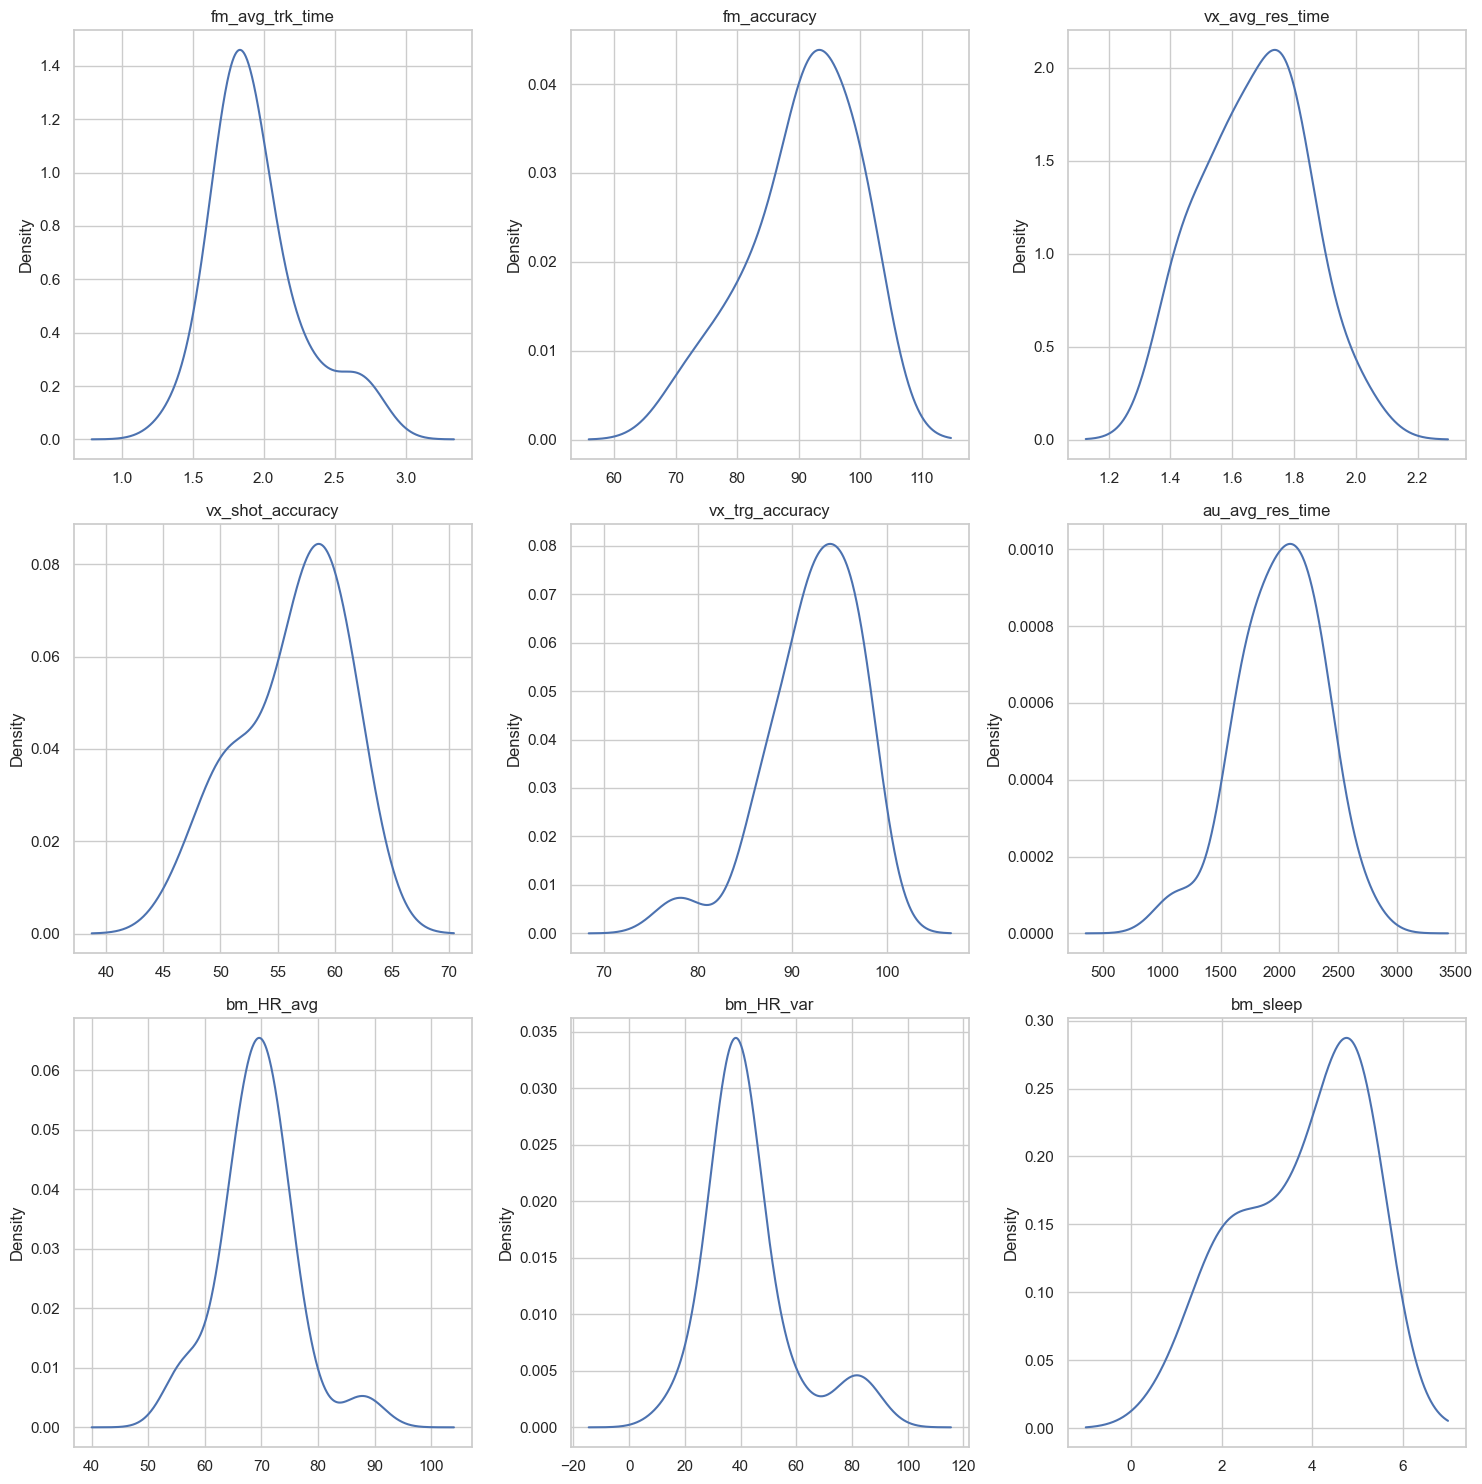

In [78]:
# plot normal distribution curve for each column using subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, column in enumerate(df_wanted.columns):
    ax = plt.subplot(3, 3, i+1)
    df_wanted[column].plot(kind='kde', ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()



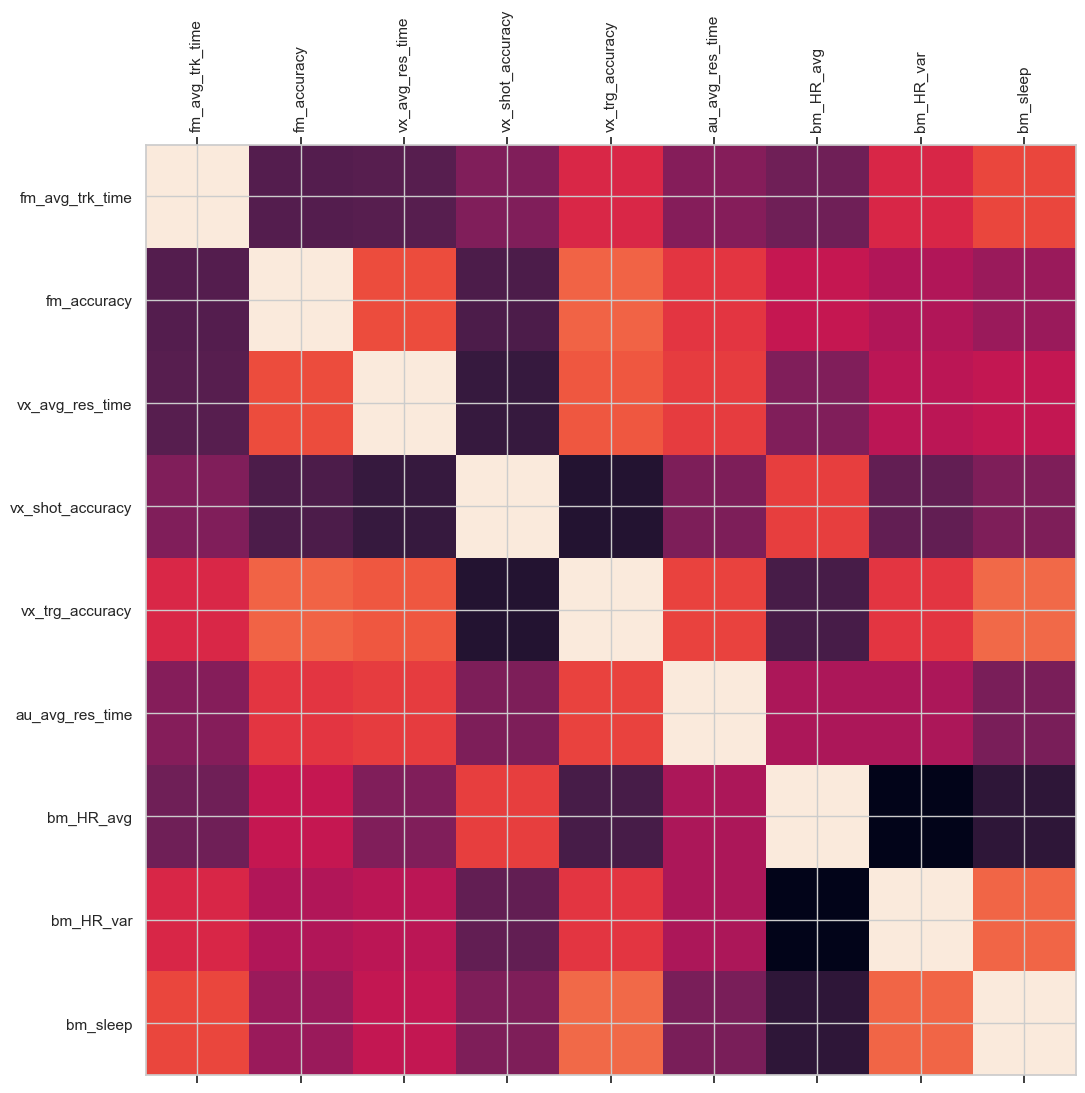

In [79]:
# show correlation matrix
correlation_matrix = df_wanted.corr()
plt.figure(figsize=(12, 12))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
#plt.colorbar()
plt.show()



In [80]:
df_independent = df_wanted.iloc[:, -3:]
df_independent.shape

(21, 3)

In [81]:
df_dependent = df_wanted.iloc[:, :-3]
df_dependent.shape

(21, 6)

# Regression Model to predict vx_shot_accuracy using independent variables as input

In [82]:
# split dataset into training and testing
#from keras.models import LinearRegression
from sklearn.model_selection import train_test_split

X = df_independent
y = df_dependent

In [83]:
# scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4217)

In [85]:
X_train

array([[-0.66021814, -0.24660242,  0.94812244],
       [ 0.10157202, -0.44836803, -2.11504238],
       [ 0.71100415,  1.09850167,  0.94812244],
       [ 0.40628808, -0.17934721,  0.94812244],
       [-0.05078601, -0.38111282, -0.58345997],
       [-0.50786011, -0.51562323,  0.94812244],
       [ 1.16807824, -0.11209201, -1.34925117],
       [ 0.40628808, -0.91915446, -1.34925117],
       [ 2.84401659, -1.6589617 , -1.34925117],
       [-0.05078601,  0.0224184 ,  0.94812244],
       [ 0.40628808, -0.71738884, -1.34925117],
       [-0.66021814, -0.0448368 ,  0.18233124],
       [ 0.10157202, -0.24660242,  0.94812244],
       [ 0.25393005,  0.56046004,  0.94812244],
       [-0.66021814, -0.44836803,  0.18233124],
       [-1.87908239,  2.57811616,  0.18233124]])

In [86]:
# create linear regression model with 3 input and 6 output
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_dim=3, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='tanh'))
model.add(tf.keras.layers.Dense(15, activation='tanh'))
model.add(tf.keras.layers.Dense(6, activation='tanh'))



In [87]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [88]:
# train model
ak = model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)



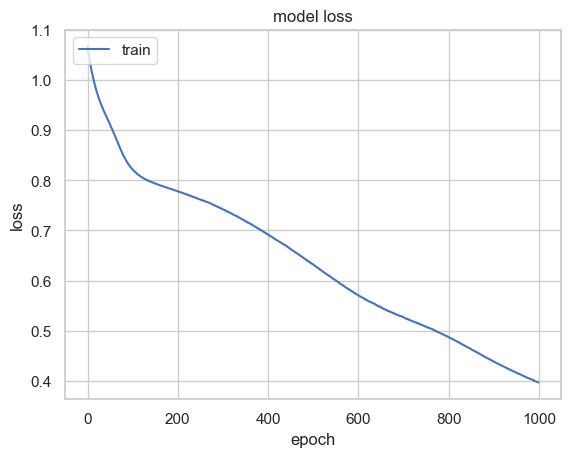

In [89]:
# plot training and validation loss
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
# calculate r2 score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2Score = r2_score(y_test, y_pred)




1/1 [==============================] - 0s 171ms/step


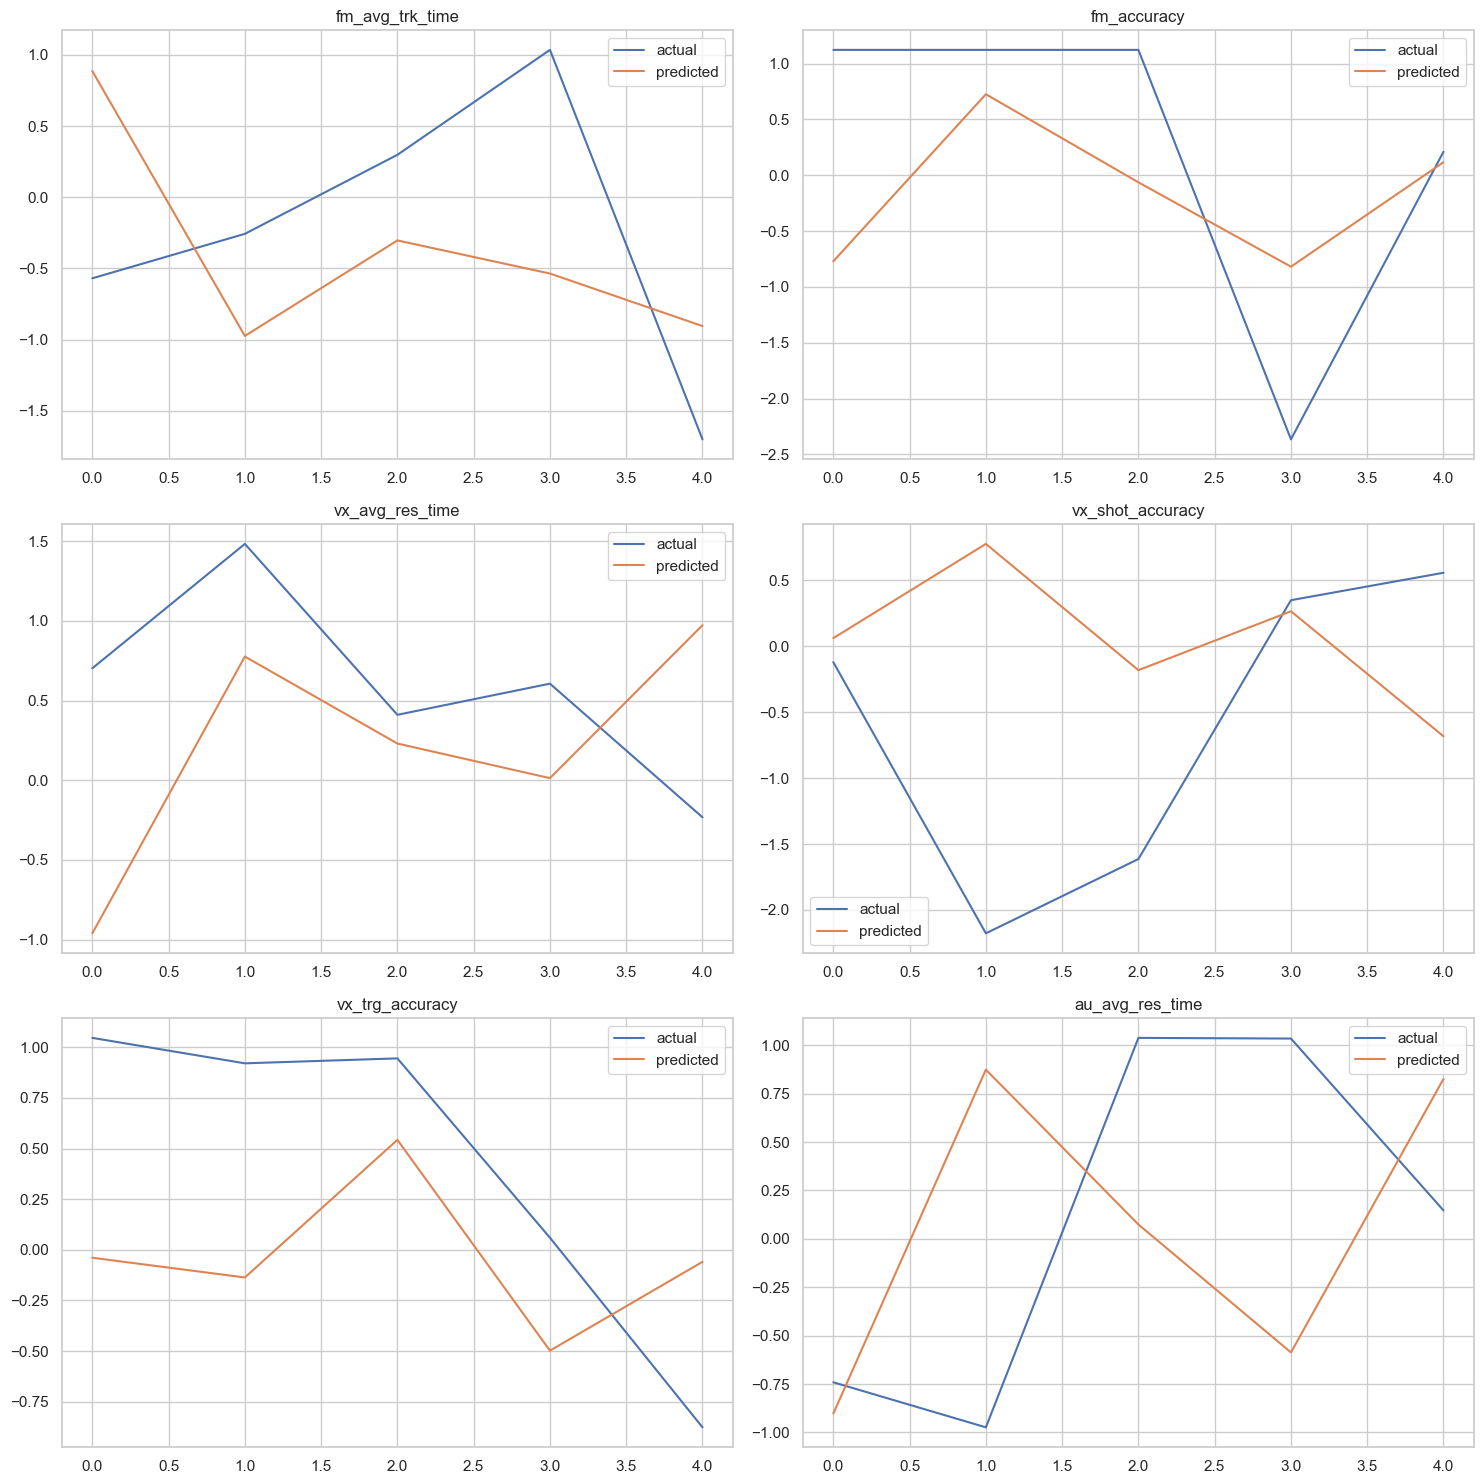

In [91]:
# plot actual vs predicted for each column
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, column in enumerate(df_dependent.columns):
    ax = plt.subplot(3, 2, i+1)
    ax.plot(y_test[:, i], label='actual')
    ax.plot(y_pred[:, i], label='predicted')
    ax.set_title(column)
    ax.legend()
plt.tight_layout()
plt.show()

In [92]:
# evaluate r2 score for the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


-0.8397619588171716

In [93]:
# evaluate r2 score for training data
y_pred_train = model.predict(X_train)
r2_score(y_train, y_pred_train)


1/1 [==============================] - 0s 71ms/step


0.590355901029348

1/1 [==============================] - 0s 55ms/step


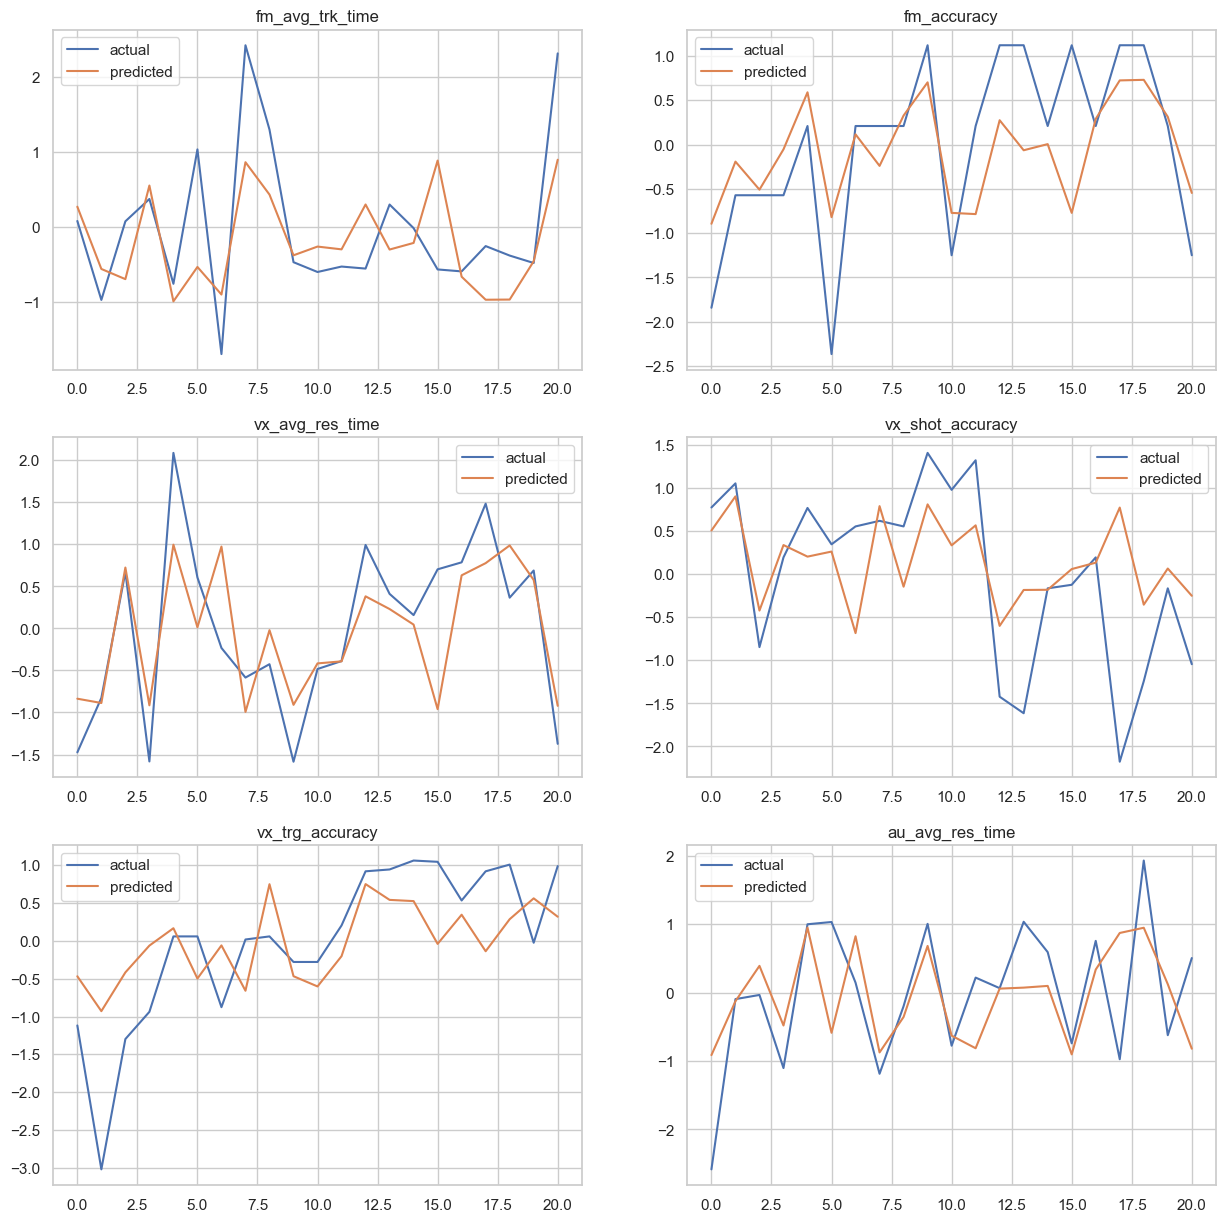

In [94]:
# evaluate prediction for all data
y_pred_all = model.predict(X)
r2_score(y, y_pred_all)

# plot actual vs predicted for each column
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, column in enumerate(df_dependent.columns):
    ax = plt.subplot(3, 2, i+1)
    ax.plot(y[:, i], label='actual')
    ax.plot(y_pred_all[:, i], label='predicted')
    ax.set_title(column)
    ax.legend()
plt.show()





In [95]:
# calculate r2 score for each output displaying label of columns
r2_scores = []
for i, column in enumerate(df_dependent.columns):
    r2 = r2_score(y[:, i], y_pred_all[:, i])
    r2_scores.append((column, r2))
r2_scores



[('fm_avg_trk_time', 0.3567262854717187),
 ('fm_accuracy', 0.42654959008688165),
 ('vx_avg_res_time', 0.5731438121150189),
 ('vx_shot_accuracy', 0.19167839921458107),
 ('vx_trg_accuracy', 0.39565881642776557),
 ('au_avg_res_time', 0.24545417189180252)]